In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

# Діаграма розсіювання
## Приклад класифікації


(26, 2)
(26,)


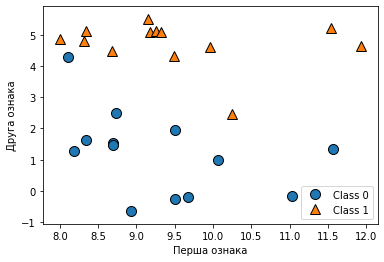

In [2]:
#генеруєм набір даних
X, y = mglearn.datasets.make_forge()
# робим графік
%matplotlib inline
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("Перша ознака")
plt.ylabel("Друга ознака")
print(X.shape)
print(y.shape)

# Прикалад регресії


(40, 1)


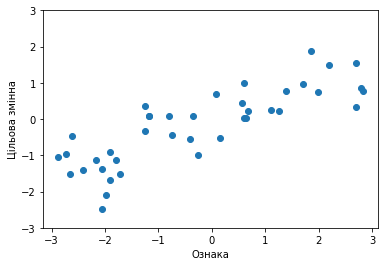

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Ознака")
plt.ylabel("Цільова змінна")

print(X.shape)

# Рак грудей

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print(cancer.data.shape)

(569, 30)


In [6]:
print(({n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

{'malignant': 212, 'benign': 357}


In [7]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Будинки Бостона (медіанна ціна)

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [10]:
print(boston.data.shape)

(506, 13)


In [11]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [12]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


# Метод K-найближчих сусідів


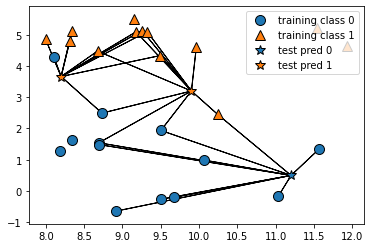

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=10)

In [15]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [17]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
print("Прогнози на тестовій виборці: ", clf.predict(X_test))

Прогнози на тестовій виборці:  [1 0 1 0 1 0 0]


In [19]:
print("Правильнітсь на тестовому наборі: ", clf.score(X_test, y_test))

Правильнітсь на тестовому наборі:  0.8571428571428571


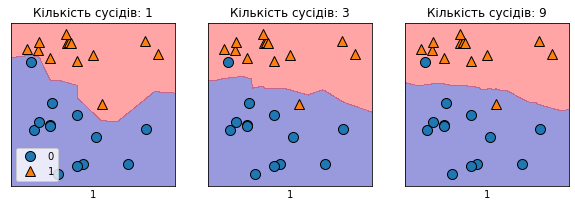

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # create clf
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X_train, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title("Кількість сусідів: {}".format(n_neighbors))
    ax.set_xlabel("0")
    ax.set_xlabel("1")
axes[0].legend(loc=3)


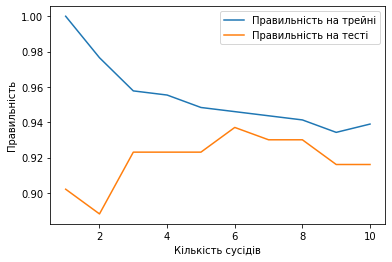

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors = 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # make model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Write trueful on train data
    training_accuracy.append(clf.score(X_train, y_train))
    # Write trueful on test's data
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Правильність на трейні")
plt.plot(neighbors_settings, test_accuracy, label="Правильність на тесті")
plt.ylabel("Правильність")
plt.xlabel("Кількість сусідів")
plt.legend()

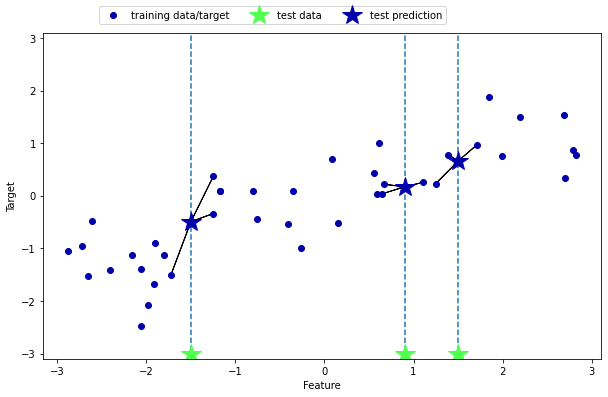

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# розбиваєм набір даних wave на тест і трейн
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# робим екземпляр моделі і встановлюєм кількість сусідів 3
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print(reg.predict(X_test))
print('\n', reg.score(X_test, y_test))

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]

 0.8344172446249605


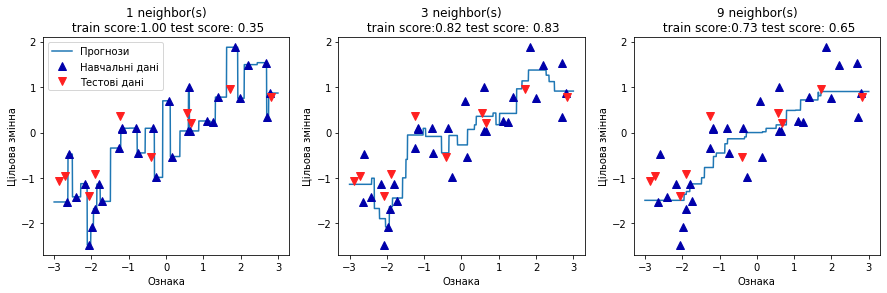

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# робим 1000 різних точок, розділяєм рівномірно між-3 і 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title("{} neighbor(s)\n train score:{:.2f} test score: {:.2f}".format(n_neighbors,
                 reg.score(X_train, y_train),
                 reg.score(X_test, y_test)))
    ax.set_xlabel("Ознака")
    ax.set_ylabel("Цільова змінна")

axes[0].legend(["Прогнози", "Навчальні дані", "Тестові дані"], loc='best')

w[0]: 0.393906  b: -0.031804


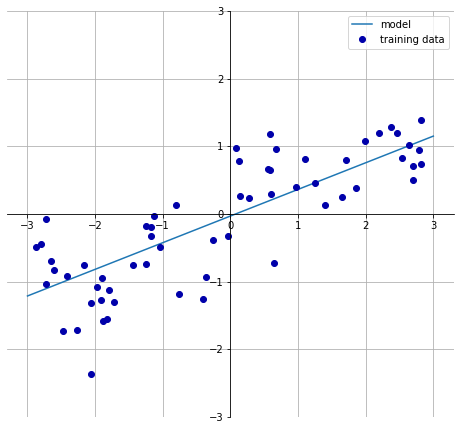

In [25]:
mglearn.plots.plot_linear_regression_wave()

# Лінійна регресія (метод найменших квадратів)

In [30]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [31]:
print("lr.coef: ", lr.coef_)

lr.coef:  [0.39390555]


In [32]:
print("lr.intercept: ", lr.intercept_)

lr.intercept:  -0.031804343026759746


In [35]:
print("Правильність на навчальнимх даних: ", lr.score(X_train, y_train))
print("Правильність на тестових даних: ", lr.score(X_test, y_test)) # bad score!

Правильність на навчальнимх даних:  0.6700890315075756
Правильність на тестових даних:  0.65933685968637


# Перенавчання

In [81]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("train: ", lr.score(X_train, y_train))
print("test: ", lr.score(X_test, y_test))

train:  0.952051960903273
test:  0.6074721959665939


# Гребневая регресия

In [82]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("train: ", ridge.score(X_train, y_train))
print("test: ", ridge.score(X_train, y_train))

train:  0.8857966585170941
test:  0.8857966585170941


In [83]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("train: ", ridge10.score(X_train, y_train))
print("test: ", ridge10.score(X_train, y_train))

train:  0.7882787115369614
test:  0.7882787115369614


#### like linear regresion

In [84]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("train: ", ridge01.score(X_train, y_train))
print("test: ", ridge01.score(X_train, y_train))

train:  0.9282273685001984
test:  0.9282273685001984


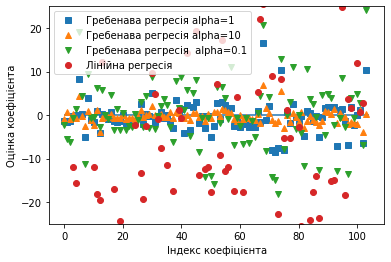

In [85]:
plt.plot(ridge.coef_, 's', label="Гребенава регресія alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребенава регресія alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребенава регресія  alpha=0.1")

plt.plot(lr.coef_, 'o', label="Лінійна регресія")
plt.xlabel("Індекс коефіцієнта")
plt.ylabel("Оцінка коефіцієнта")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

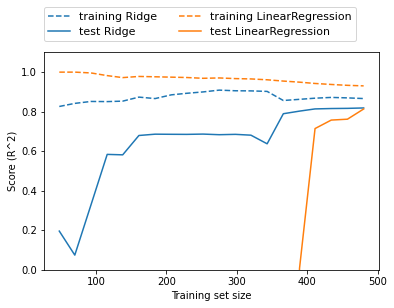

In [86]:
mglearn.plots.plot_ridge_n_samples()

# Лассо

In [87]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("train: ", lasso.score(X_train, y_train))
print("test: ", lasso.score(X_test, y_test))
print("Кількість використаних ознак: ", np.sum(lasso.coef_!=0))

train:  0.29323768991114607
test:  0.20937503255272294
Кількість використаних ознак:  4


In [88]:
# мы увеличиваем значение "max_iter",
# иначе модель выдаст предупреждение, что нужно увеличить max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)

print("train: ", lasso001.score(X_train, y_train))
print("test: ", lasso001.score(X_test, y_test))
print("Кількість використаних ознак: ", np.sum(lasso001.coef_!=0))

train:  0.8962226511086497
test:  0.7656571174549982
Кількість використаних ознак:  33


In [89]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("train: ", lasso0001.score(X_train, y_train))
print("test: ", lasso0001.score(X_test, y_test))
print("Кількість використаних ознак: ", np.sum(lasso0001.coef_!=0))

train:  0.9507158754515463
test:  0.6437467421272821
Кількість використаних ознак:  96


Text(0, 0.5, 'Оцінка коеф')

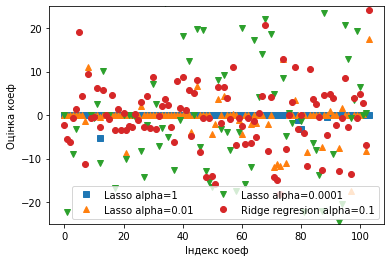

In [90]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge regresion alpha=0.1") # best decision for Ridge
plt.legend(ncol=2)
plt.ylim(-25, 25)
plt.xlabel("Індекс коеф")
plt.ylabel("Оцінка коеф")

# Лінійні моделі для класифікації

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

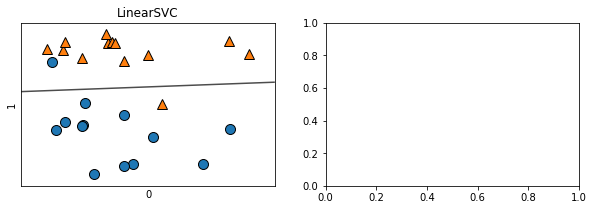

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LinearRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("0")
    ax.set_ylabel("1")
axes[0].legend()